<a href="https://colab.research.google.com/github/anand008186/NLP--LLMs/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [ ]:
X = df.drop(columns=["Exited"])
y = df["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Print both X train and X test to check sclaed data

X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(units=3, activation='sigmoid',input_dim = (X_train_scaled.shape[1])))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=32)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8014 - loss: 0.5277
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7965 - loss: 0.4983
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 0.4713
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7912 - loss: 0.4669
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7971 - loss: 0.4514
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7961 - loss: 0.4415
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.4394
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8051 - loss: 0.4250
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8027 - loss: 0.4247
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7991 - loss: 0.4335
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4328
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
model.layers[1].get_weights()


[array([[-2.3570132],
        [-1.3018551],
        [-1.8765849]], dtype=float32),
 array([1.249936], dtype=float32)]

In [ ]:
y_log = model.predict(X_test_scaled)
y_log

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[0.18650404],
       [0.11572532],
       [0.19557348],
       ...,
       [0.0422667 ],
       [0.10449009],
       [0.35333925]], dtype=float32)

In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.833

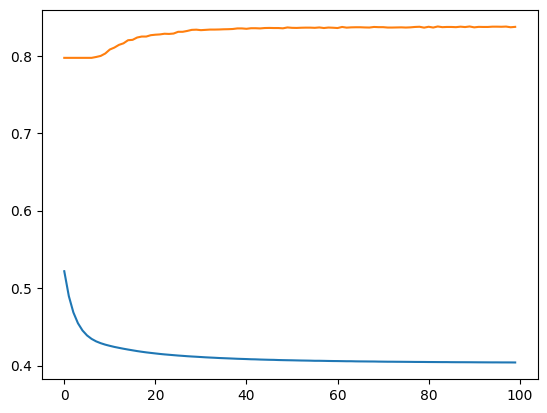

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])